In [1]:
# install OpenCV
# import numpy as np
# import matplotlib.pyplot as plt
# from PIL import Imagea

!pip3 install opencv-python
import cv2

(650, 980, 3)

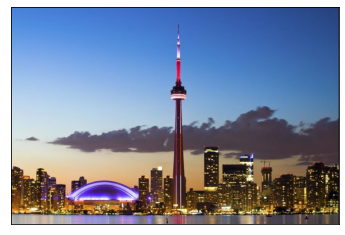

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
img = cv2.imread("image1.jpg")
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.xticks([]), plt.yticks([])
img2.shape

In [31]:
#Gaussian Blur
def GaussianBlurring(x, y, sig):
    x1, y1 = np.meshgrid(np.linspace(-1,1,x), np.linspace(-1,1,y))
    dst = x1*x1+y1*y1
    
    #Gaussian array
    gauss = (1/2*np.pi*sig**2)*np.exp(-( dst / ( 2 * sig**2 ) ) )
    gauss_norm = np.linalg.norm(gauss)
    return gauss_norm

3522.395115357604


array([[0.01831564, 0.01984093, 0.02145819, ..., 0.02145819, 0.01984093,
        0.01831564],
       [0.01984093, 0.02149325, 0.02324519, ..., 0.02324519, 0.02149325,
        0.01984093],
       [0.02145819, 0.02324519, 0.02513994, ..., 0.02513994, 0.02324519,
        0.02145819],
       ...,
       [0.02145819, 0.02324519, 0.02513994, ..., 0.02513994, 0.02324519,
        0.02145819],
       [0.01984093, 0.02149325, 0.02324519, ..., 0.02324519, 0.02149325,
        0.01984093],
       [0.01831564, 0.01984093, 0.02145819, ..., 0.02145819, 0.01984093,
        0.01831564]])

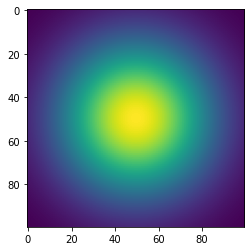

In [53]:
GaussianBlurring(100,100,1)

(([], []), ([], []))

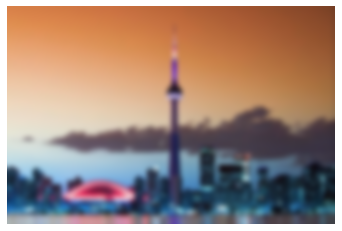

In [14]:
kernel = cv2.getGaussianKernel(15, 500)
img = cv2.sepFilter2D(img,-1,kernelX=kernel,kernelY=kernel)
plt.imshow(img)
plt.axis('off')
plt.xticks([]), plt.yticks([])